In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Implement Logistic Regression

This will be helpful to further familiarize yourself with Numpy and how Logistic Regression actually works.
If you face any problems, feel free to contact us in Slack

### Load the breast cancer dataset (from sklearn)

In [2]:
# Code here
dataset = load_breast_cancer()

In [3]:
# df_cancer

X = dataset.data
Y = dataset.target

df_cancer = pd.DataFrame(dataset.data, columns=dataset.feature_names)  
df_cancer['class'] = dataset.target


In [4]:
Y = df_cancer['class']              
X = df_cancer.drop('class', axis=1) 

### Train test split

In [5]:
# Code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=1)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


### Apply feature scaling on the data

In [7]:
# Code here
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )

In [9]:
# X_train

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [10]:
W = np.random.uniform(low=-1, high=0.5, size=(X_train.shape[1]+1) )
# mu, sigma = 0, 3
# W = np.random.normal(mu, sigma, X_train.shape[1]+1)
alpha =  0.1
W.shape
# np.amax(W)

(31,)

In [11]:
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_train.shape

(455, 31)

In [12]:
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
X_test.shape

(114, 31)

In [13]:
X_train[5]

array([ 1.        ,  2.61000862,  0.1225521 ,  2.52828812,  2.98779119,
       -0.246294  ,  0.41836533,  0.96744715,  1.33001241, -1.17864093,
       -1.15882827,  3.1954026 , -0.91268854,  3.29944663,  3.00350777,
       -0.43424236,  0.45200786,  0.23588386,  1.58666423,  0.17599892,
       -0.35334621,  3.08116817, -0.311521  ,  3.16105383,  3.41006432,
       -0.57967795,  0.6288585 ,  0.46658863,  1.66841578, -0.02869461,
       -0.63749022])

In [14]:
Y_train.shape

(455,)

### Define sigmoid and its derivative
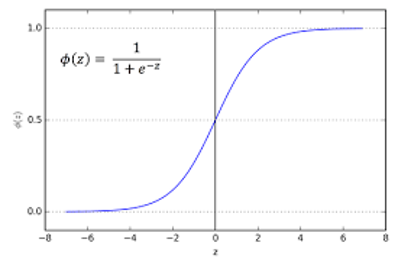

In [15]:
def sigmoid(X: np.array):
    # Apply sigmoid to X and return 
    s = 1 / (1 + np.exp(-X))
    return s

def sigmoid_(X: np.array):
    # return derivative of sigmoid
    d = sigmoid(X)*(1-sigmoid(X))
    return d

In [16]:
sigmoid(-700)

9.85967654375977e-305

In [17]:
sigmoid(37)

1.0

### Prediction methods

In [18]:
def predict_prob(X, W):
    # Return the class probabilities here
    scores = np.dot(W,X.T)
    predictions = sigmoid(scores)
    return predictions

### Define the Cross entropy loss function

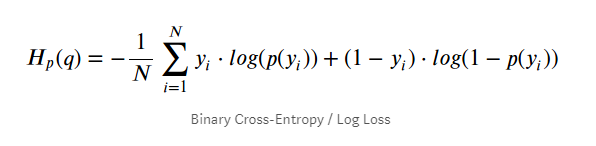

In [19]:
# Code here
def binary_cross_entropy(y, yhat):
    m = yhat.shape[0]
    result = (- 1 / m) * np.sum(y * np.log(yhat) + (1 - y) * (np.log(1 - yhat))) 
#     first_term = - y*np.log(yhat)
#     second_term = -(1-y)*np.log(1-yhat)
#     result = - np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    return (result)


In [20]:
print(X_train.shape)
print(W.shape)

(455, 31)
(31,)


In [21]:
yhat = predict_prob(X_train, W)

In [22]:
loss = binary_cross_entropy(Y_train, yhat)

loss

0.34174977375501403

# Solve using Gradient Descent

### Calculate gradient
For practice, you can try to derive the gradient using pen and paper

In [23]:
def compute_gradient(X, y, W):
    m = X.shape[0]
    
    h = predict_prob(X, W)
    loss = h - y
    
    # Gradient Calculation
    dW = X.T.dot(loss) / m
    return dW

### Update Weights

In [24]:
# Code here
W = W - alpha*compute_gradient(X_train, Y_train, W)

### Repeat for N- Iterations

In [25]:
N = 1000
losses = []
for i in range(N):
    # Predict
    yhat = predict_prob(X_train, W)
    
    # Calculate Loss
    loss = binary_cross_entropy(Y_train, yhat)
    
    # Compute gradient dL/dW
    dW = compute_gradient(X_train, Y_train,W)
    
    # Update the weights
    W = W - alpha*dW
    
    losses.append(loss)

### Plot the loss curve

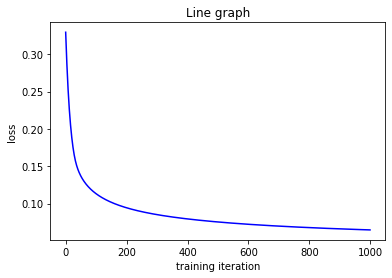

In [26]:
# Loss curve here
# losses
import matplotlib.pyplot as plt

x = np.arange(1000)
 
# plotting
plt.title("Line graph")
plt.xlabel("training iteration")
plt.ylabel("loss")
plt.plot(x,losses, color ="blue")
plt.show()

In [27]:
Y_pred = np.round( predict_prob(X_test, W))

### Calculate the classification report and the confusion matrix

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [29]:
# Scores here
precision = precision_score(Y_test, Y_pred)
print('Precision: %f' % precision)

recall = recall_score(Y_test, Y_pred)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, Y_pred)
print('F1 score: %f' % f1)



Precision: 0.986111
Recall: 0.986111
F1 score: 0.986111


[[41  1]
 [ 1 71]]


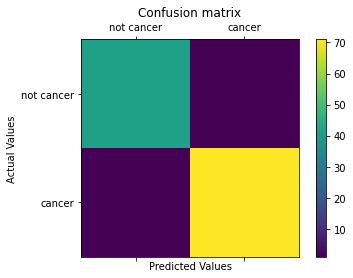

In [30]:
import warnings
warnings.filterwarnings("ignore")


labels=['not cancer','cancer']
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# BONUS: Create a LogisticRegression Class [OPTIONAL]
Create a Sklearn-like API

In [31]:
class LogisticRegression:
    # You can define additional functions as per your need
    def __init__(self, alpha=0.001, n_iter=1000):
        self.W = None
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

In [34]:
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X)

### Compare metrics with Sklearn's implementation

In [ ]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

In [ ]:
sklearn_model = SKLogisticRegression()
sklearn_model.fit(X, y)
sklearn_predictions = sklearn_model.predict(X)

In [ ]:
### compare classification report and confusion matrix here